<a href="https://colab.research.google.com/github/Shaurya2127/practice_projects/blob/main/Debt_status_project_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importing requried libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,accuracy_score,precision_score,recall_score,f1_score

In [5]:
# Loading the dataset
data = pd.read_csv('Company_x(csv).csv')

<ipython-input-5-415072ecd0c0>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('Company_x(csv).csv')


In [8]:
data.describe()

,EntityID,AccountID,PurchasePrice,NumLiableParties,CustomerAge,NumPhones,NumEmails,NumAddresses,Unnamed: 22,Unnamed: 23,Unnamed: 24
count,4.064230e+05,4.064230e+05,403731.000000,406301.000000,376941.000000,406423.000000,406423.000000,406423.000000,0.0,0.0,1.0
mean,3.970443e+07,3.954380e+08,5.618606,1.017145,45.728061,0.435652,0.208113,0.847354,NaN,NaN,960.0
std,4.698070e+07,4.654769e+08,5.441934,0.132866,12.950395,0.714852,0.434321,0.459690,NaN,NaN,NaN
min,1.600000e+02,3.677000e+03,0.190000,1.000000,-41.000000,0.000000,0.000000,0.000000,NaN,NaN,960.0
25%,3.010600e+06,3.023088e+07,3.070000,1.000000,36.000000,0.000000,0.000000,1.000000,NaN,NaN,960.0
50%,3.010949e+06,3.045075e+07,4.220000,1.000000,44.000000,0.000000,0.000000,1.000000,NaN,NaN,960.0
75%,9.990131e+07,9.901891e+08,6.590000,1.000000,54.000000,1.000000,0.000000,1.000000,NaN,NaN,960.0
max,9.990159e+07,9.904958e+08,52.180000,4.000000,133.000000,8.000000,5.000000,7.000000,NaN,NaN,960.0


In [9]:
# checking for null values
print(data.isnull().sum())

EntityID                           0
OriginalCreditor[Redacted]         0
AccountID                          0
CurrentBalance                     0
DebtLoadPrincipal                  0
Balanaceatdebt_load                0
PurchasePrice                   2692
ProductOrDebtType                  0
CollectionStatus                   0
ClosureReason                 397393
InBankruptcy                       0
AccountInsolvencyType         406138
CustomerInsolvencyType        397892
IsLegal                            0
LastPaymentAmount             302446
LastPaymentMethod             302446
NumLiableParties                 122
CustomerAge                    29482
NumPhones                          0
NumEmails                          0
NumAddresses                       0
IsStatBarred                       0
Unnamed: 22                   406423
Unnamed: 23                   406423
Unnamed: 24                   406422
dtype: int64


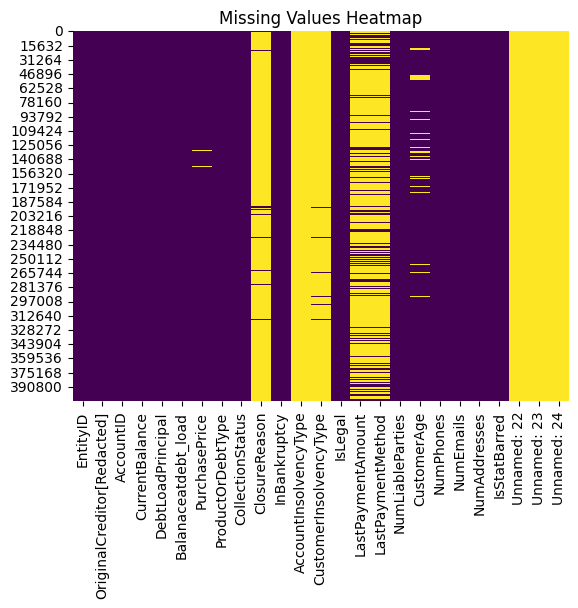

In [10]:
# Visualize missing data
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [11]:
# filling the null values in above  data

# Fill numerical null values with the mean
for col in data.select_dtypes(include=np.number):
    data[col] = data[col].fillna(data[col].mean())

# Fill categorical null values with the mode
for col in data.select_dtypes(exclude=np.number):
    data[col] = data[col].fillna(data[col].mode()[0])

print(data.isnull().sum())

EntityID                           0
OriginalCreditor[Redacted]         0
AccountID                          0
CurrentBalance                     0
DebtLoadPrincipal                  0
Balanaceatdebt_load                0
PurchasePrice                      0
ProductOrDebtType                  0
CollectionStatus                   0
ClosureReason                      0
InBankruptcy                       0
AccountInsolvencyType              0
CustomerInsolvencyType             0
IsLegal                            0
LastPaymentAmount                  0
LastPaymentMethod                  0
NumLiableParties                   0
CustomerAge                        0
NumPhones                          0
NumEmails                          0
NumAddresses                       0
IsStatBarred                       0
Unnamed: 22                   406423
Unnamed: 23                   406423
Unnamed: 24                        0
dtype: int64


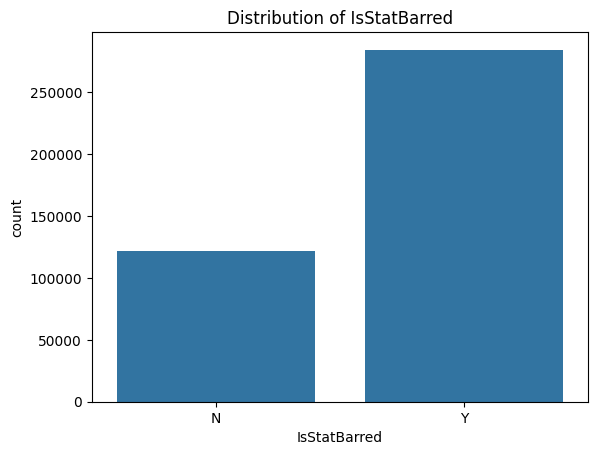

In [12]:
# Analyze the distribution of 'IsStatBarred'

sns.countplot(x='IsStatBarred', data=data)
plt.title('Distribution of IsStatBarred')
plt.show()

In [13]:
# splitting the data into independent and dependent variable
X = data.drop(columns = ["EntityID","AccountID","NumPhones","NumEmails","NumAddresses","Unnamed: 22","Unnamed: 23","Unnamed: 24","IsStatBarred"],axis = 1)
X.shape

(406423, 16)

In [14]:
Y = data['IsStatBarred']
Y.shape

(406423,)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406423 entries, 0 to 406422
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   EntityID                    406423 non-null  int64  
 1   OriginalCreditor[Redacted]  406423 non-null  object 
 2   AccountID                   406423 non-null  int64  
 3   CurrentBalance              406423 non-null  object 
 4   DebtLoadPrincipal           406423 non-null  object 
 5   Balanaceatdebt_load         406423 non-null  object 
 6   PurchasePrice               406423 non-null  float64
 7   ProductOrDebtType           406423 non-null  object 
 8   CollectionStatus            406423 non-null  object 
 9   ClosureReason               406423 non-null  object 
 10  InBankruptcy                406423 non-null  object 
 11  AccountInsolvencyType       406423 non-null  object 
 12  CustomerInsolvencyType      406423 non-null  object 
 13  IsLegal       

In [16]:
# defining the column transformer for preprocessing
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [17]:
len(numerical_features)

3

In [18]:
len(categorical_features)

13

In [23]:
# encoding categorical variables
label_encoder = LabelEncoder()
for col in categorical_features:
    X[col] = label_encoder.fit_transform(X[col])

In [25]:
Y = label_encoder.fit_transform(Y)

In [26]:
# Spliting the dataset into training and testing sets)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
# Training Random Forest Classifier and evaluating the model
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
model_rf.fit(X_train, Y_train)
y_pred_rf = model_rf.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     24309
           1       0.99      0.98      0.98     56976

    accuracy                           0.98     81285
   macro avg       0.97      0.98      0.97     81285
weighted avg       0.98      0.98      0.98     81285

Confusion Matrix:
 [[23603   706]
 [ 1057 55919]]


In [32]:
# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train, Y_train)
y_pred_lr = model_lr.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_lr))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.62      0.70     24309
           1       0.85      0.94      0.89     56976

    accuracy                           0.84     81285
   macro avg       0.84      0.78      0.80     81285
weighted avg       0.84      0.84      0.84     81285

Confusion Matrix:
 [[14954  9355]
 [ 3270 53706]]


In [33]:
# Decision Tree Classifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, Y_train)
y_pred_dt = model_dt.predict(X_test)
print("Classification Report:\n", classification_report(Y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred_dt))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     24309
           1       0.98      0.98      0.98     56976

    accuracy                           0.97     81285
   macro avg       0.97      0.97      0.97     81285
weighted avg       0.97      0.97      0.97     81285

Confusion Matrix:
 [[23204  1105]
 [ 1141 55835]]


In [37]:
# Step 7: Evaluate model performance
models = {'Logistic Regression': y_pred_lr, 'Decision Tree': y_pred_dt, 'Random Forest': y_pred_rf}
results = []  # Initialize results as a list

for model_name, predictions in models.items():
    accuracy = accuracy_score(Y_test, predictions)
    precision = precision_score(Y_test, predictions)
    recall = recall_score(Y_test, predictions)
    f1 = f1_score(Y_test, predictions)
    roc_auc = roc_auc_score(Y_test, predictions)

    # Append a dictionary with evaluation metrics to the list
    results.append({"Model": model_name,
                    "Accuracy": accuracy,
                    "Precision": precision,
                    "Recall": recall,
                    "F1 Score": f1,
                    "ROC AUC": roc_auc})

# Create the DataFrame from the list of results
results = pd.DataFrame(results)



In [38]:
# Display the results
print("Model Performance Metrics:\n", results)

Model Performance Metrics:
                  Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.844682   0.851652  0.942607  0.894824  0.778885
1        Decision Tree  0.972369   0.980594  0.979974  0.980284  0.967259
2        Random Forest  0.978311   0.987532  0.981448  0.984481  0.976203


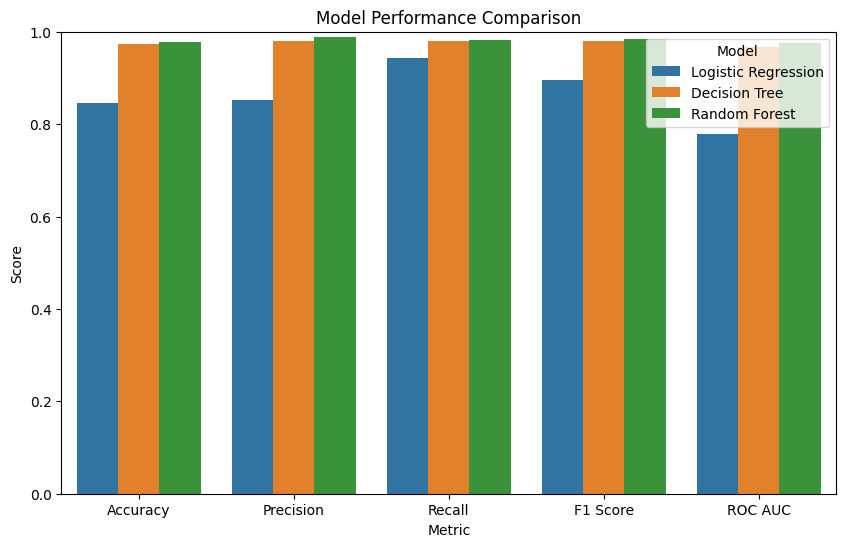

In [40]:
# Step 8: Generate Graphical Representations
plt.figure(figsize=(10, 6))
sns.barplot(data=results.melt(id_vars='Model', var_name='Metric', value_name='Score'),
             x='Metric', y='Score', hue='Model')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)
plt.show()

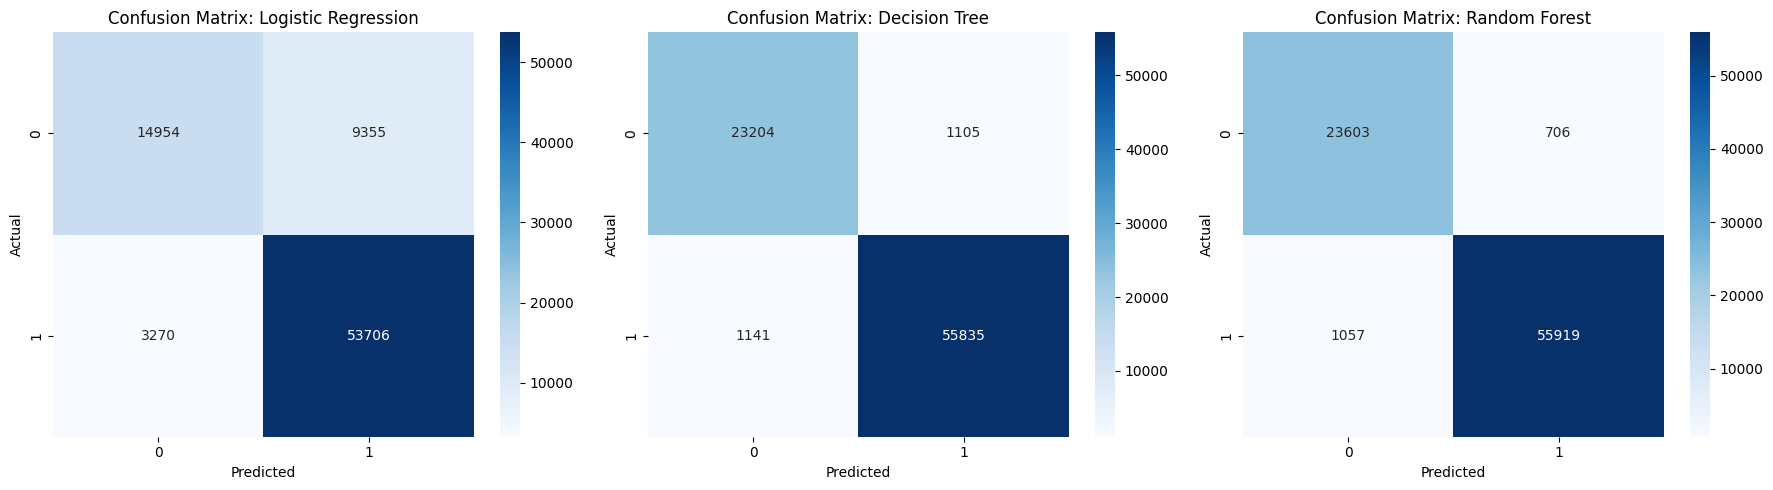

In [42]:
# Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (model_name, predictions) in zip(axes, models.items()):
    cm = confusion_matrix(Y_test, predictions)
    sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap='Blues')
    ax.set_title(f'Confusion Matrix: {model_name}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')
plt.tight_layout()
plt.show()